## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%capture
import warnings
warnings.filterwarnings('ignore')

## Reading the data set

In [3]:
df = pd.read_csv("salary.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Data Preparation

 #### 1- Handling missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.shape

(375, 6)

In [6]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [7]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

#### Duplicate Records in Data

In [8]:
df[df.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [9]:
df[df.duplicated()].shape

(50, 6)

#### Droping duplicate records

In [10]:
df=df.drop_duplicates(keep='first')

#### Null values in columns

In [11]:
df.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

#### Droping  missing values

In [12]:
df.dropna(how = 'any', inplace = True)
df.shape

(324, 6)

## Data Exploration and Visualization

#### Statistics of Numerical Columns

In [13]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


#### Correlation Analysis

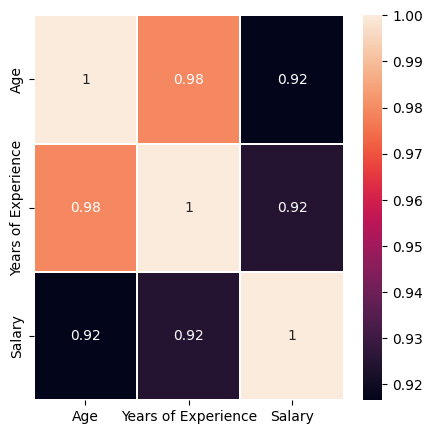

In [14]:
numeric_data = df.select_dtypes(include='number')
corrMatrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrMatrix, annot=True, linewidths=0.1, ax=ax)
plt.show()

####  Data Visualization - Bar Chart,Histogram

In [15]:
df['Education Level'].value_counts()

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

<Axes: xlabel='Education Level'>

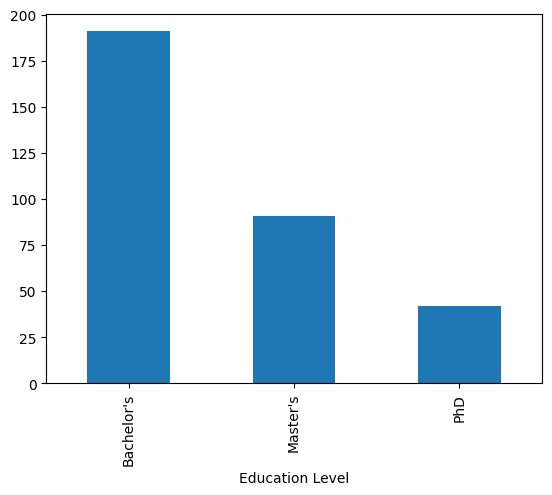

In [16]:
df['Education Level'].value_counts().plot(kind = 'bar')

In [17]:
df['Job Title'].value_counts()

Job Title
Director of Operations            9
Director of Marketing             8
Senior Marketing Manager          8
Senior Project Manager            7
Senior Data Scientist             6
                                 ..
Junior Social Media Specialist    1
Junior Operations Coordinator     1
Senior HR Specialist              1
Director of HR                    1
Junior Financial Advisor          1
Name: count, Length: 174, dtype: int64

<Axes: ylabel='count'>

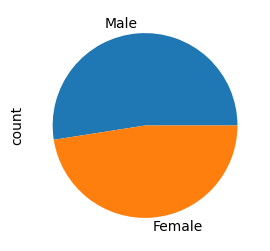

In [18]:
df['Gender'].value_counts().plot(kind = 'pie',figsize=(3, 3) )

<Axes: ylabel='Frequency'>

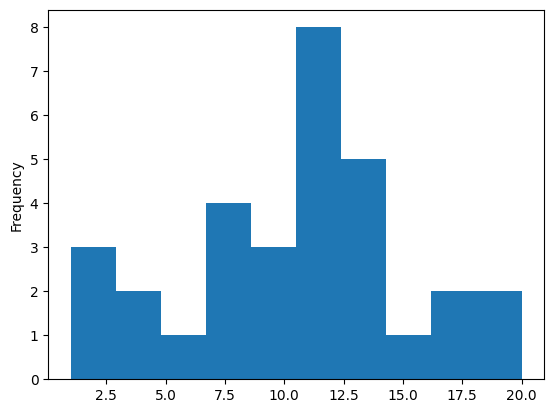

In [19]:
df['Age'].value_counts().plot(kind = 'hist')

<Axes: >

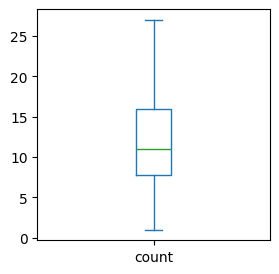

In [20]:
df['Years of Experience'].value_counts().plot(kind = 'box',figsize=(3, 3))

<Axes: ylabel='count'>

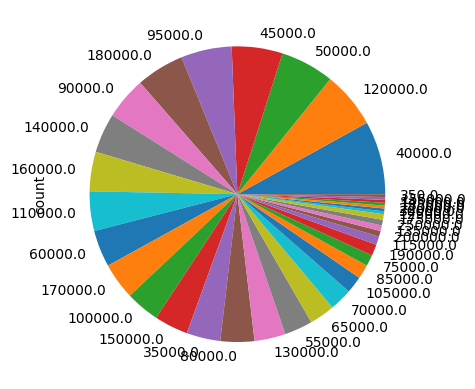

In [21]:
df['Salary'].value_counts().plot(kind = 'pie')

## Encoding Categorical Variables

In [22]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [23]:
# All Categorical data is encoded in form of numeric data
# Gender= 0-male , 1-female
# Education Level [ (0-Bachelor's), (1-Master's)  (2-PhD)  ]


categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


### Splitting Data Into Train And Test

In [24]:
x = df[['Age','Gender','Education Level','Job Title','Years of Experience']]
y = df['Salary']

In [25]:
x
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
73,28.0,1,0,166,2.0
182,44.0,0,2,155,15.0
17,39.0,1,2,116,12.0
24,41.0,1,1,37,13.0
146,42.0,0,2,115,16.0


In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 5)
(65, 5)
(259,)
(65,)


#  Model Building

## Training the model

#### Linear Regression Model 

In [29]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_pred = lr_model.predict(x_test)
y_pred

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450906,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [31]:
dff = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred})
dff['Error'] = dff['y_Actual'] - dff['y_Predicted']
dff['Absolute_error'] = abs(dff['Error'])
Mean_Absolute_error = dff['Absolute_error'].mean()
print('Mean_Absolute_error',Mean_Absolute_error)
dff.head()

Mean_Absolute_error 10570.786401136189


,y_Actual,y_Predicted,Error,Absolute_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305


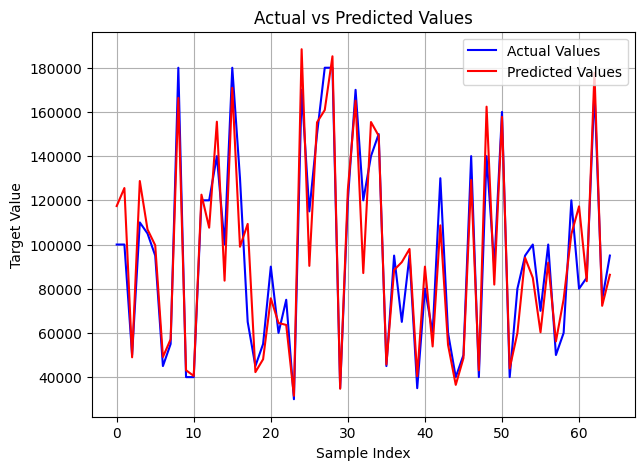

In [32]:
plt.figure(figsize=(7, 5))
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#### Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Model Accuracy

In [34]:
r2_score(y_test, y_pred)

0.8911231066517087

In [37]:
"""
    Age= 28
    Gender=1,  ### Male is encoded as 1 
    Education level= Master ### master is 1 after encoded
    Job Title=Data Analyst    ### Data Analyst is 17 after encoded
    Year's Experience= 3
"""
Emp_salary = lr_model.predict([[28,1,1,17,3]])
print("Employee Salary is : ",Emp_salary[0],)

Employee Salary is :  62338.90868559593


# Model Deployment

In [36]:
import pickle
import warnings
pickle.dump(lr_model,open("model.pkl","wb"))
print("Model is succesfully created and save in the directories .\nNow intregrate saved model with web framework through which user will intract and predict Employee salary" )

Model is succesfully created and save in the directories .
Now intregrate saved model with web framework through which user will intract and predict Employee salary
